In [1]:
%matplotlib inline

import numpy as np
import torch
from torch import optim

torch.set_printoptions(edgeitems=2)

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [3]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 7, 10,  4,  0,  8,  3,  6,  9,  1]), tensor([2, 5]))

In [4]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [5]:
from torch import nn

linear_model = nn.Linear(1, 1) # <1>
linear_model(t_un_val)

tensor([[2.3831],
        [2.1295]], grad_fn=<AddmmBackward>)

In [6]:
linear_model.weight

Parameter containing:
tensor([[0.2727]], requires_grad=True)

In [7]:
linear_model.bias

Parameter containing:
tensor([0.7962], requires_grad=True)

In [8]:
x = torch.ones(1)
linear_model(x)

tensor([1.0689], grad_fn=<AddBackward0>)

In [9]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[1.0689],
        [1.0689],
        [1.0689],
        [1.0689],
        [1.0689],
        [1.0689],
        [1.0689],
        [1.0689],
        [1.0689],
        [1.0689]], grad_fn=<AddmmBackward>)

In [10]:
linear_model = nn.Linear(1, 1) # <1>

optimizer = optim.SGD(
    linear_model.parameters(), # <2>
    lr=1e-2)

In [11]:
linear_model.parameters()

<generator object Module.parameters at 0x11534a830>

In [12]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.1654]], requires_grad=True), Parameter containing:
 tensor([0.3087], requires_grad=True)]

In [13]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)
        
        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            print("Epoch {}, Training loss {}, Validation loss {}".format(
                epoch, float(loss_train), float(loss_val)))

In [14]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs=3000,
    optimizer=optimizer,
    model=linear_model,
    loss_fn=loss_fn,
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 199.28695678710938, Validation loss 143.3638916015625
Epoch 1000, Training loss 3.9514291286468506, Validation loss 1.481102705001831
Epoch 2000, Training loss 3.3598363399505615, Validation loss 1.0968657732009888
Epoch 3000, Training loss 3.3497250080108643, Validation loss 1.0535238981246948

Parameter containing:
tensor([[5.3261]], requires_grad=True)
Parameter containing:
tensor([-17.1001], requires_grad=True)


In [15]:
linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs=3000,
    optimizer=optimizer,
    model=linear_model,
    loss_fn=nn.MSELoss(),
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 85.81344604492188, Validation loss 43.8984260559082
Epoch 1000, Training loss 3.916577100753784, Validation loss 1.4665923118591309
Epoch 2000, Training loss 3.359239339828491, Validation loss 1.0953776836395264
Epoch 3000, Training loss 3.3497135639190674, Validation loss 1.0533390045166016

Parameter containing:
tensor([[5.3263]], requires_grad=True)
Parameter containing:
tensor([-17.1012], requires_grad=True)


In [16]:
seq_model = nn.Sequential(
    nn.Linear(1, 13), # <1>
    nn.Tanh(),
    nn.Linear(13, 1)) # <2>

seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [17]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [18]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [19]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [20]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [21]:
seq_model.output_linear.bias

Parameter containing:
tensor([0.1285], requires_grad=True)

In [22]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) # <1>

training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val)

print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 202.24403381347656, Validation loss 149.8858184814453
Epoch 1000, Training loss 6.016160011291504, Validation loss 0.7489764094352722
Epoch 2000, Training loss 4.018176555633545, Validation loss 0.4915013015270233
Epoch 3000, Training loss 2.42065167427063, Validation loss 0.4095587432384491
Epoch 4000, Training loss 2.060159206390381, Validation loss 0.9152108430862427
Epoch 5000, Training loss 1.9795546531677246, Validation loss 1.148699402809143
output tensor([[12.4415],
        [ 7.0414]], grad_fn=<AddmmBackward>)
answer tensor([[15.],
        [ 8.]])
hidden tensor([[-1.2252e+01],
        [-1.3686e+01],
        [-1.4908e+01],
        [ 9.2789e+00],
        [-1.2327e-02],
        [-2.9335e-01],
        [-8.0478e-01],
        [-1.6075e+00]])


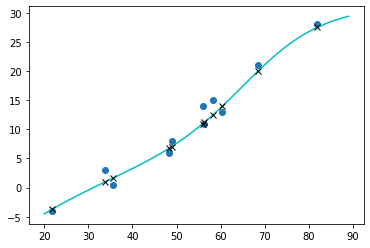

In [23]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

Epoch 1, Training loss 205.98098754882812, Validation loss 154.4783477783203
Epoch 1000, Training loss 66.41300201416016, Validation loss 10.903243064880371
Epoch 2000, Training loss 38.26426696777344, Validation loss 6.545628547668457
Epoch 3000, Training loss 21.247486114501953, Validation loss 3.8972816467285156
Epoch 4000, Training loss 12.138529777526855, Validation loss 2.28920578956604
Epoch 5000, Training loss 8.025649070739746, Validation loss 1.4149106740951538


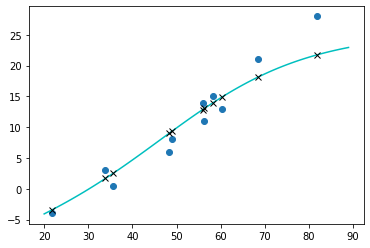

In [24]:
# Exercises here!

neuron_count = 20

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, neuron_count)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(neuron_count, 1))
]))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-4) # <1>

training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val)

plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')